<a href="https://colab.research.google.com/github/vnapasupathi/aiml/blob/main/textAnalytics_textProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
! curl "https://raw.githubusercontent.com/vnapasupathi/files/main/MartinLSpeech.txt" -o speech.txt
document = open("speech.txt", "r")

mlk_speech = document.read()
print (mlk_speech)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10954  100 10954    0     0   120k      0 --:--:-- --:--:-- --:--:--  120k
In his iconic speech at the Lincoln Memorial for the 1963 March on Washington for Jobs and Freedom, King urged America to "make real the promises of democracy." King synthesized portions of his earlier speeches to capture both the necessity for change and the potential for hope in American society.

I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. [applause]

Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves [Audience:] (Yeah) who had been seared in the flames of withering injustice. It came as a joyous daybreak 

In [25]:
# remove digits

mlk_speech = ''.join(char for char in mlk_speech if not char.isdigit())
print(mlk_speech)

In his iconic speech at the Lincoln Memorial for the  March on Washington for Jobs and Freedom, King urged America to "make real the promises of democracy." King synthesized portions of his earlier speeches to capture both the necessity for change and the potential for hope in American society.

I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. [applause]

Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves [Audience:] (Yeah) who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. (Hmm)

But one hundred years later (All right), the Negro still is not free. (My Lord, Yeah) One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and 

In [27]:
# remove punctuation

from string import punctuation

mlk_speech = ''.join(char for char in mlk_speech if char not in punctuation).lower()
print(mlk_speech)

in his iconic speech at the lincoln memorial for the  march on washington for jobs and freedom king urged america to make real the promises of democracy king synthesized portions of his earlier speeches to capture both the necessity for change and the potential for hope in american society

i am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation applause

five score years ago a great american in whose symbolic shadow we stand today signed the emancipation proclamation this momentous decree came as a great beacon light of hope to millions of negro slaves audience yeah who had been seared in the flames of withering injustice it came as a joyous daybreak to end the long night of their captivity hmm

but one hundred years later all right the negro still is not free my lord yeah one hundred years later the life of the negro is still sadly crippled by the manacles of segregation and the chains of discrimination 

In [29]:
# remove stopwords

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

mlk_speech = ' '.join([word for word in mlk_speech.split() if word not in (stopwords.words('english'))])
print (mlk_speech)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
iconic speech lincoln memorial march washington jobs freedom king urged america make real promises democracy king synthesized portions earlier speeches capture necessity change potential hope american society happy join today go history greatest demonstration freedom history nation applause five score years ago great american whose symbolic shadow stand today signed emancipation proclamation momentous decree came great beacon light hope millions negro slaves audience yeah seared flames withering injustice came joyous daybreak end long night captivity hmm one hundred years later right negro still free lord yeah one hundred years later life negro still sadly crippled manacles segregation chains discrimination hmm one hundred years later right negro lives lonely island poverty midst vast ocean material prosperity one hundred years later lord applause negro still languishe

In [37]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import pandas as pd
nltk.download("punkt")

ps = PorterStemmer()
words = nltk.tokenize.word_tokenize(mlk_speech)
stems = [ps.stem(word) for word in words]

#fd = FreqDist(words)
fd = FreqDist(stems)
fd_df = pd.DataFrame(fd, index=[0]).T

print (fd_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
          0
icon      1
speech    4
lincoln   1
memori    1
march     2
...      ..
old       1
spiritu   1
last      3
thank     1
almighti  1

[481 rows x 1 columns]


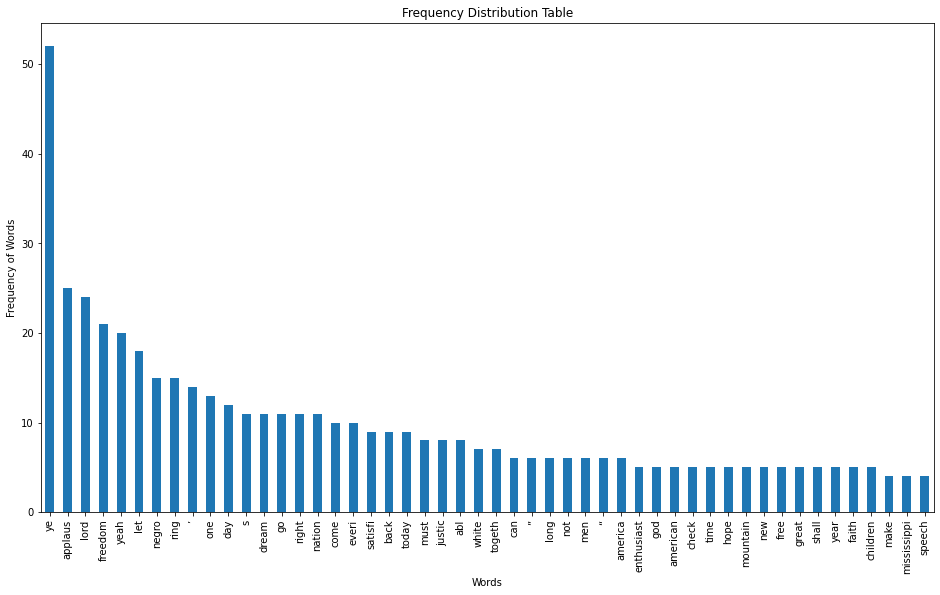

In [38]:
import matplotlib.pyplot as plt

counts = fd_df.sort_values(0, ascending=False)

#aspectratio 'ax' would be set to 16 by 9 pixel size - standard
ar = plt.figure(figsize=(16,9))
ax = ar.gca()
counts[0][:50].plot(kind='bar', ax=ax)
ax.set_title("Frequency Distribution Table")
ax.set_ylabel("Frequency of Words")
ax.set_xlabel("Words")
plt.show()